<a href="https://colab.research.google.com/github/Uz8351/MyPhython/blob/master/Aula_23_9_nov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*******************************
Historial de loss:
Iteración 0 valores de x:22.488352624525263
Iteración 1 valores de x:21.012041488857076
Iteración 2 valores de x:16.51855552317193
Iteración 3 valores de x:11.701582932367028
Iteración 4 valores de x:6.79250703246828
Iteración 5 valores de x:3.723071929329574
Iteración 6 valores de x:1.8197366807671551
Iteración 7 valores de x:0.9130288301091892
Iteración 8 valores de x:0.4642146301295464
Iteración 9 valores de x:0.26472916252197093
Iteración 10 valores de x:0.17285013694698229
Iteración 11 valores de x:0.13223815510156403
Iteración 12 valores de x:0.11390944959921681
Iteración 13 valores de x:0.10575954563916047
Iteración 14 valores de x:0.10208544247974344
Iteración 15 valores de x:0.10042589433045751
Iteración 16 valores de x:0.09965846839171333
Iteración 17 valores de x:0.09929040256279208
Iteración 18 valores de x:0.0990998898125425
Iteración 19 valores de x:0.09898875150022195
Iteración 20 valores de x:0.09891302732825638
Iteraci

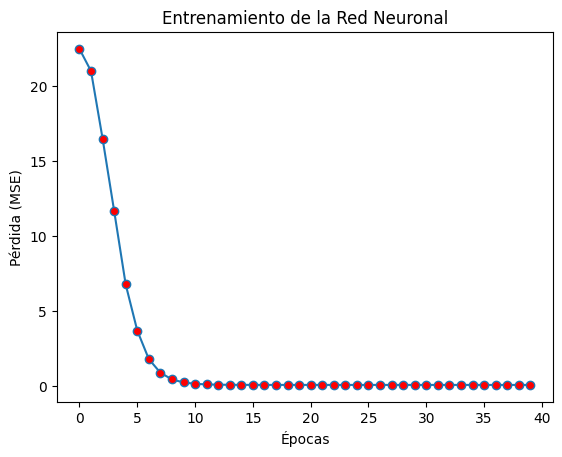

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la arquitectura de la red neuronal
input_size = 8
hidden_size = 12
output_size = 1
learning_rate = 0.001
epochs = 40

# Inicializar los pesos y sesgos de forma aleatoria
np.random.seed(0)
weights_input_hidden = np.random.rand(input_size, hidden_size)
bias_hidden = np.zeros((1, hidden_size))
weights_hidden_output = np.random.rand(hidden_size, output_size)
bias_output = np.zeros((1, output_size))

# Función de activación (usaremos la función sigmoid)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Función de pérdida (Mean Squared Error)
def mse_loss(y_true, y_pred):
    return ((y_true - y_pred) ** 2).mean()

# Datos de entrenamiento sintéticos
X = np.random.rand(100, input_size)
y = np.random.rand(100, output_size)

# Listas para almacenar los valores de pérdida a lo largo de las épocas
losses = []

# Entrenamiento de la red neuronal
for epoch in range(epochs):
    # Forward pass
    hidden_input = np.dot(X, weights_input_hidden) + bias_hidden
    hidden_output = sigmoid(hidden_input)
    output_input = np.dot(hidden_output, weights_hidden_output) + bias_output
    output = output_input

    # Calcular la pérdida
    loss = mse_loss(y, output)
    losses.append(loss)


    # Backpropagation
    d_loss = 2 * (output - y)
    d_output = d_loss
    d_weights_hidden_output = np.dot(hidden_output.T, d_output)
    d_bias_output = d_output.sum(axis=0)
    d_hidden = np.dot(d_output, weights_hidden_output.T) * (hidden_output * (1 - hidden_output))
    d_weights_input_hidden = np.dot(X.T, d_hidden)
    d_bias_hidden = d_hidden.sum(axis=0)

    # Actualizar pesos y sesgos
    weights_input_hidden -= learning_rate * d_weights_input_hidden
    bias_hidden -= learning_rate * d_bias_hidden
    weights_hidden_output -= learning_rate * d_weights_hidden_output
    bias_output -= learning_rate * d_bias_output
print("*******************************")
print("Historial de loss:")
for index, misxvalues in enumerate(losses):

  print(f'Iteración {index} valores de x:{misxvalues}')
# Graficar la pérdida a lo largo de las épocas
plt.plot(range(epochs), losses, marker='o',markerfacecolor='red')
plt.xlabel('Épocas')
plt.ylabel('Pérdida (MSE)')
plt.title('Entrenamiento de la Red Neuronal')
plt.show()
